**“Red Wine Quality Prediction”**

Data Analytics - Project

Kacper Błachowiak, Jakub Ciura

1. Problem formulation

- Project Goal

The project goal is to predict quality of variants of the Portuguese "Vinho Verde".
Prediction will be based on values of selected input variables such as: fixed acidity,
volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur
dioxide, density, pH, sulphates, alcohol. As a result system will determine quality of wine
and classify each to appropriate category (poor, excellent, etc.)

- Purpose of Creating a Model and Potential Use Cases

The main goal of building a model using this dataset is to predict the quality of red wine based on its physicochemical properties. By analyzing these features, a predictive model can help estimate the wine quality score without the need for costly and time-consuming expert tastings.

Potential use cases include:

  -  Assisting winemakers in quality control by identifying batches with likely high or low quality before distribution.

- Supporting decisions in blending and production processes to improve overall wine quality.

- Enabling retailers and consumers to better understand and evaluate wine quality through data-driven insights.

- Serving as a benchmark for developing more advanced machine learning models in food and beverage quality assessment.

- Source of the data and contents

The data comes from a public dataset available on Kaggle, based on research published by Cortez et al. in 2009. This dataset was created to analyze the quality of red wine based on various physicochemical properties.

It contains 1,599 samples of red wine, each described by 11 physicochemical features such as fixed acidity, volatile acidity, residual sugar, pH, sulfur dioxide levels, and alcohol content. Each sample is also assigned a quality score ranging from 0 to 10, given by expert tasters. The goal of this dataset is to enable analysis and modeling of the relationship between the chemical characteristics and the wine quality rating.

- DAG

/tmp/ipykernel_9/2580940403.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


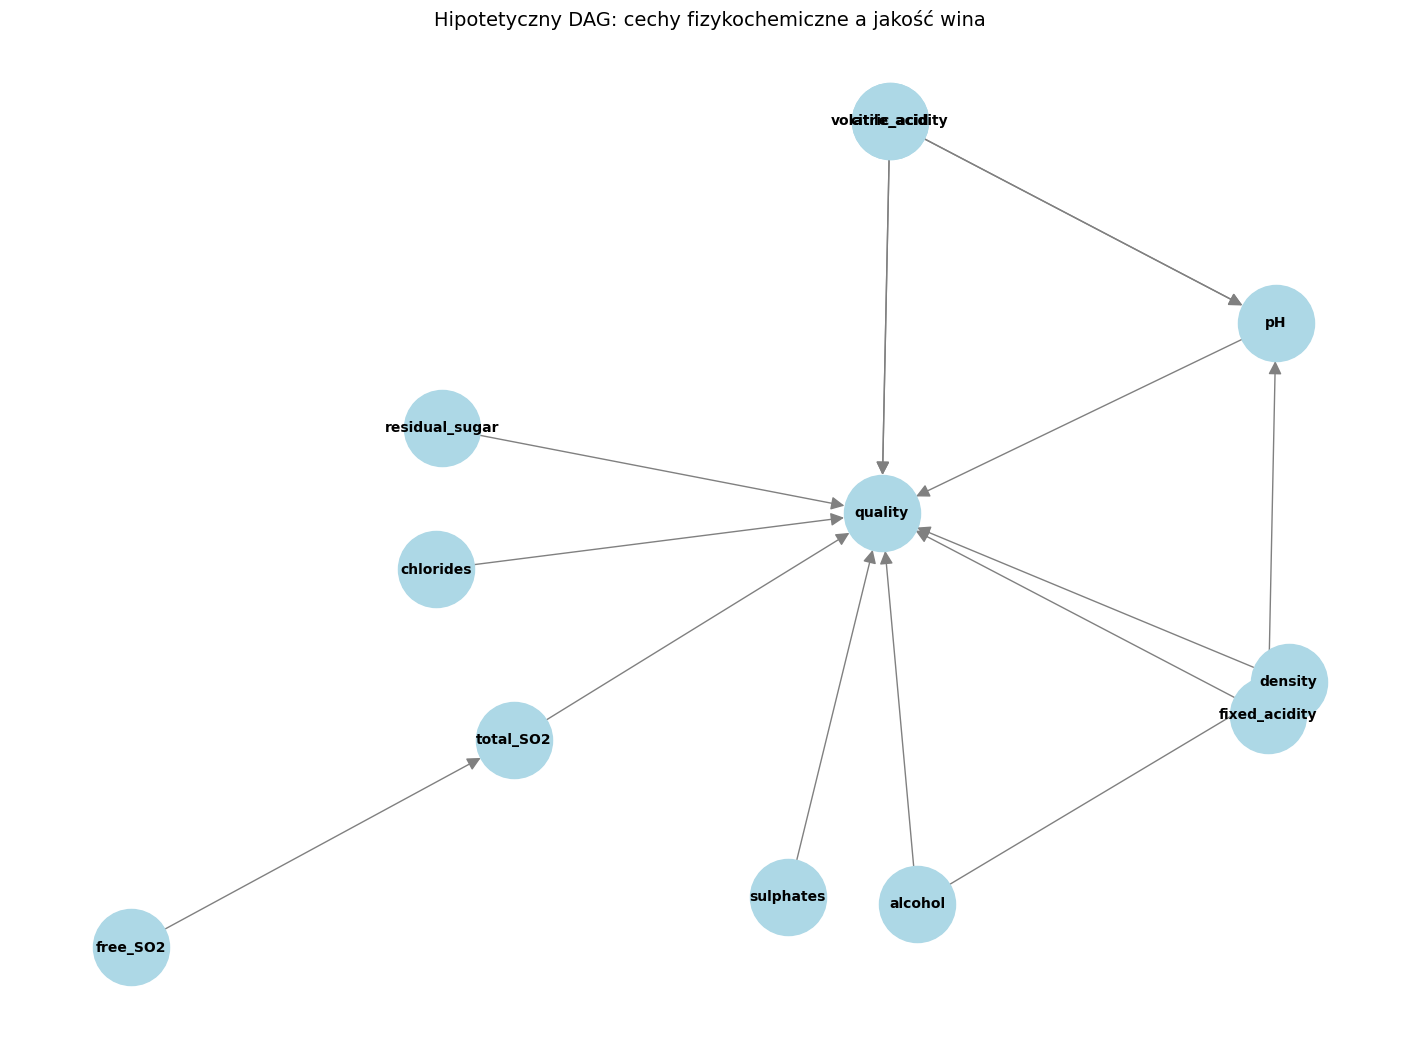

In [34]:
import matplotlib.pyplot as plt
import networkx as nx

# 1. Tworzenie grafu DAG
G = nx.DiGraph()

edges = [
    ('fixed_acidity', 'pH'),
    ('volatile_acidity', 'pH'),
    ('citric_acid', 'pH'),
    ('citric_acid', 'quality'),
    ('residual_sugar', 'quality'),
    ('pH', 'quality'),
    ('chlorides', 'quality'),
    ('free_SO2', 'total_SO2'),
    ('total_SO2', 'quality'),
    ('sulphates', 'quality'),
    ('alcohol', 'quality'),
    ('alcohol', 'density'),
    ('density', 'quality'),
    ('fixed_acidity', 'quality'),
    ('volatile_acidity', 'quality'),
]

G.add_edges_from(edges)

# 2. Ustawienie layoutu
pos = nx.kamada_kawai_layout(G)  # Możesz też spróbować nx.spring_layout(G, k=1.5)

# 3. Rysowanie
plt.figure(figsize=(14, 10))
nx.draw(
    G, pos,
    with_labels=True,
    node_color='lightblue',
    node_size=3000,
    font_size=10,
    font_weight='bold',
    edge_color='gray',
    arrowsize=20
)
plt.title("Hipotetyczny DAG: cechy fizykochemiczne a jakość wina", fontsize=14)
plt.tight_layout()
plt.show()


- confoundings (pipe, fork, collider) were described
  
| Fork                                  | Opis                                    |

| ------------------------------------- | --------------------------------------- |

| `citric_acid ← pH → volatile_acidity` | pH jest wspólną przyczyną dwóch cech    |

| `pH ← fixed_acidity → quality`        | fixed\_acidity wpływa na pH i na jakość |

| `pH ← volatile_acidity → quality`     | volatile\_acidity wpływa na pH i jakość |

| `density ← alcohol → quality`         | alkohol wpływa na gęstość i jakość      |

| Pipe                              | Opis                                           |

| --------------------------------- | ---------------------------------------------- |

| `citric_acid → pH → quality`      | pośredni wpływ cytrynowego kwasu na jakość     |

| `fixed_acidity → pH → quality`    | pH jest ogniwem między kwasowością a jakością  |

| `volatile_acidity → pH → quality` | lotna kwasowość przez pH wpływa na jakość      |

| `free_SO2 → total_SO2 → quality`  | suma SO₂ pośredniczy w wpływie wolnego SO₂     |

| `alcohol → density → quality`     | gęstość jest ogniwem wpływu alkoholu na jakość |

| Collider                                   | Opis                       |

| ------------------------------------------ | -------------------------- |

| `citric_acid → quality ← fixed_acidity`    | jakość jako wspólny skutek |

| `citric_acid → quality ← volatile_acidity` |                            |

| `residual_sugar → quality ← pH`            |                            |

| `chlorides → quality ← pH`                 |                            |

| `total_SO2 → quality ← sulphates`          |                            |

| `alcohol → quality ← sulphates`            |                            |

| `density → quality ← alcohol`              |                            |

| `density → quality ← pH`                   |                            |




2. Data preprocessing <-- need to be specified and reasoned